<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train[0].shape

(28, 28)

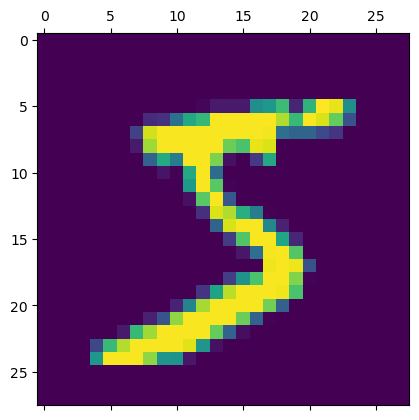

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8753 - loss: 0.4438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.1287
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9756 - loss: 0.0853
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0666
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0511
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9877 - loss: 0.0419
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0330
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9923 - loss: 0.0265
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9938 - loss: 0.0206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9945 - loss: 0.0186


In [10]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9701 - loss: 0.1139


[0.09624369442462921, 0.9735999703407288]

In [11]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [40]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [12]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9083 - loss: 0.3087
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9838 - loss: 0.0556
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9898 - loss: 0.0335
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9927 - loss: 0.0236
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9955 - loss: 0.0145


In [61]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [56]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9843


[0.05414153262972832, 0.9843000173568726]

In [15]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[2.5730922e-03, 1.4303449e-01, 5.4975456e-01, 1.4615296e-01,
        5.9992657e-04, 4.9182149e-03, 1.5731418e-07, 9.9999893e-01,
        3.4649229e-01, 1.4424013e-01],
       [6.0827136e-02, 9.5840520e-01, 1.0000000e+00, 1.5061745e-02,
        3.3326953e-06, 2.0209125e-06, 3.1783260e-02, 1.4223679e-03,
        4.9156677e-03, 9.0953974e-05],
       [1.4131005e-03, 9.9998134e-01, 3.0594931e-03, 1.8903993e-04,
        3.3174688e-01, 8.7282006e-03, 3.7808925e-02, 4.5592502e-01,
        9.7726993e-02, 5.6300675e-03],
       [9.9999774e-01, 1.6376215e-03, 3.7754666e-02, 3.5326244e-04,
        5.7052668e-05, 6.3788153e-02, 2.5617507e-01, 1.7198866e-02,
        3.0672053e-04, 9.6849956e-02],
       [9.8401504e-03, 4.7932286e-03, 7.5092199e-03, 7.1706707e-03,
        9.9999052e-01, 2.1283284e-02, 2.1221012e-02, 5.0880061e-03,
        7.1396935e-01, 9.6611154e-01]], dtype=float32)

In [16]:
y_classes = [np.argmax(element) for element in y_pred]#proti element er max valur index return kore argmax
y_classes[:5]

[7, 2, 1, 0, 4]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)